Best solution found: Solution with parameters: [0.10917339611707932, 1.551411243553924, 0.5269438373378565, 0.5863302209734411, 0.7539131819343403]
Fitness of the best solution: 3.5277718799166413


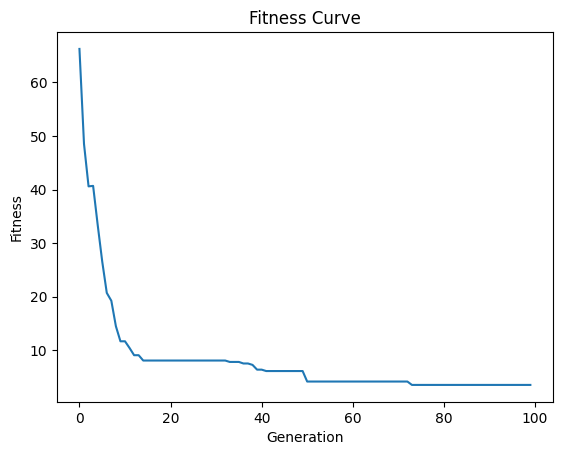

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define a hypothetical Solution class for the boiler design problem
class Solution:
    def __init__(self, parameters):
        self.parameters = parameters  # parameters representing design variables

    def calculate_fitness(self):
        # A hypothetical fitness calculation for a boiler design
        # Lower values are considered better in this example
        return np.sum(self.parameters)

    def __repr__(self):
        return f"Solution with parameters: {self.parameters}"

# Modify the initial population generator to create design solutions
def generate_initial_population(pop_size, num_parameters):
    population = []
    for _ in range(pop_size):
        # Generate random values for each parameter within a specific range
        parameters = np.random.uniform(low=0, high=100, size=num_parameters)
        population.append(Solution(parameters))
    return population

# GeneticAlgorithm class handles the evolution of solutions
class GeneticAlgorithm:
    def __init__(self, pop_size, num_parameters, max_generations, mutation_rate):
        self.pop_size = pop_size
        self.num_parameters = num_parameters
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.population = generate_initial_population(pop_size, num_parameters)
        self.fitness_curve = []

    def calculate_fitness(self, solution):
        return solution.calculate_fitness()

    def select_parents(self):
        # Sort the population based on fitness and select the top half
        sorted_population = sorted(self.population, key=self.calculate_fitness)
        return sorted_population[:len(sorted_population)//2]

    def crossover(self, parent1, parent2):
        # Create a child with a mix of parameters from both parents
        child_parameters = []
        for i in range(self.num_parameters):
            if random.random() > 0.5:
                child_parameters.append(parent1.parameters[i])
            else:
                child_parameters.append(parent2.parameters[i])
        return Solution(child_parameters)

    def mutate(self, solution):
        # Mutate a solution's parameters based on the mutation rate
        for i in range(self.num_parameters):
            if random.random() < self.mutation_rate:
                solution.parameters[i] = np.random.uniform(low=0, high=100)
        return solution

    def evolve_population(self):
        # Create a new generation using selection, crossover, and mutation
        parents = self.select_parents()
        children = []
        while len(children) < self.pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            children.append(child)
        self.population = children

    def run(self):
        for generation in range(self.max_generations):
            self.evolve_population()
            # Calculate the fitness for plotting
            best_solution = min(self.population, key=self.calculate_fitness)
            self.fitness_curve.append(self.calculate_fitness(best_solution))

# Define the boiler design problem and solve it using the genetic algorithm
class BoilerDesignProblem:
    def __init__(self, num_parameters=5, pop_size=100, max_generations=100, mutation_rate=0.01):
        self.ga = GeneticAlgorithm(pop_size, num_parameters, max_generations, mutation_rate)

    def solve(self):
        self.ga.run()
        best_solution = min(self.ga.population, key=self.ga.calculate_fitness)
        print(f"Best solution found: {best_solution}")
        print(f"Fitness of the best solution: {self.ga.calculate_fitness(best_solution)}")

    def plot_fitness_curve(self):
        plt.plot(self.ga.fitness_curve)
        plt.title('Fitness Curve')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.show()

if __name__ == "__main__":
    boiler_problem = BoilerDesignProblem()
    boiler_problem.solve()
    boiler_problem.plot_fitness_curve()
